# "Predictive Magic: Employee Turnover Insights with Python and Logistic Regression"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
def load_file():
    try:
        df = pd.read_csv("HR_Analytics_Dataset.csv")
        return df
    except FileNotFoundError:
        print("Please sure that you have file in current directory.")
        return None
    except Exception as e:
        print(f"Error : {str(e)}")
        return None

df = load_file()
print("File uploaded sucessfully !")

File uploaded sucessfully !


In [3]:
# Reading first 5 data of datasets
df.head()

,EmployeeID,Age,Gender,Department,EducationLevel,JobRole,YearsAtCompany,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Overtime,PerformanceRating,Attrition,MonthlyIncome
0,1,50,Male,Marketing,1,Analyst,17,4,2,9,Yes,3,No,32956
1,2,36,Female,IT,2,Analyst,5,1,2,6,No,3,No,29193
2,3,29,Male,Finance,3,Manager,16,1,2,5,No,4,No,206465
3,4,42,Male,Marketing,1,Specialist,24,3,3,1,No,3,No,32283
4,5,40,Female,Sales,2,Executive,14,3,2,2,No,2,Yes,18136


In [4]:
# Reading last 5 data 
df.tail()

,EmployeeID,Age,Gender,Department,EducationLevel,JobRole,YearsAtCompany,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Overtime,PerformanceRating,Attrition,MonthlyIncome
4995,4996,45,Male,Finance,1,Specialist,12,2,3,0,No,3,No,29354
4996,4997,37,Male,Sales,2,Specialist,11,2,4,6,Yes,3,No,34101
4997,4998,34,Male,Marketing,3,Clerk,21,4,2,0,No,2,No,15071
4998,4999,46,Female,IT,2,Specialist,8,2,2,6,No,1,No,11931
4999,5000,25,Male,Finance,3,Analyst,26,4,2,8,Yes,3,No,35878


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Gender                 5000 non-null   object
 3   Department             5000 non-null   object
 4   EducationLevel         5000 non-null   int64 
 5   JobRole                5000 non-null   object
 6   YearsAtCompany         5000 non-null   int64 
 7   JobSatisfaction        5000 non-null   int64 
 8   WorkLifeBalance        5000 non-null   int64 
 9   TrainingTimesLastYear  5000 non-null   int64 
 10  Overtime               5000 non-null   object
 11  PerformanceRating      5000 non-null   int64 
 12  Attrition              5000 non-null   object
 13  MonthlyIncome          5000 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 547.0+ KB


#### Findings :
#### The study founds that there are all together 14 columns in the datasets with 9 integers data type and 5 object data type column.

In [6]:
# To check the null values in the dataset
df.isnull().sum()

EmployeeID               0
Age                      0
Gender                   0
Department               0
EducationLevel           0
JobRole                  0
YearsAtCompany           0
JobSatisfaction          0
WorkLifeBalance          0
TrainingTimesLastYear    0
Overtime                 0
PerformanceRating        0
Attrition                0
MonthlyIncome            0
dtype: int64

#### Findings :
##### The study founds that there are no null value in any column of the data sets

In [7]:
# To check the duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

##### Findings :
The study founds that there are no duplicates value in the datasets.

In [8]:
# Checking basic statistics if the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,40.6998,10.927249,22.0,31.00,41.0,50.00,59.0
EducationLevel,5000.0,2.1394,0.789489,1.0,2.00,2.0,3.00,4.0
YearsAtCompany,5000.0,15.6076,8.587058,1.0,8.00,16.0,23.00,30.0
JobSatisfaction,5000.0,2.4816,1.011863,1.0,2.00,2.0,3.00,4.0
WorkLifeBalance,5000.0,2.5058,0.803054,1.0,2.00,3.0,3.00,4.0
TrainingTimesLastYear,5000.0,4.4994,2.876535,0.0,2.00,5.0,7.00,9.0
PerformanceRating,5000.0,2.8360,0.799270,1.0,2.00,3.0,3.00,4.0
MonthlyIncome,5000.0,64281.7628,69172.445125,3314.0,20653.50,34024.5,64399.25,279971.0


In [9]:
df.dtypes

EmployeeID                int64
Age                       int64
Gender                   object
Department               object
EducationLevel            int64
JobRole                  object
YearsAtCompany            int64
JobSatisfaction           int64
WorkLifeBalance           int64
TrainingTimesLastYear     int64
Overtime                 object
PerformanceRating         int64
Attrition                object
MonthlyIncome             int64
dtype: object

In [10]:
# To check the unique values in Gender features

df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
# To check the unique values in Department features

df["Department"].unique()

array(['Marketing', 'IT', 'Finance', 'Sales', 'HR'], dtype=object)

In [12]:
# To check the unique values in job role features

df["JobRole"].unique()

array(['Analyst', 'Manager', 'Specialist', 'Executive', 'Clerk'],
      dtype=object)

In [13]:
# To check the unique values in overtime features

df["Overtime"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
# To check the unique values in Attrition features

df["Attrition"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
encoder = LabelEncoder()
Gender = encoder.fit_transform(df["Gender"])
df["Gender_Encoded"] = Gender

In [16]:
df["Gender_Encoded"].head()

0    1
1    0
2    1
3    1
4    0
Name: Gender_Encoded, dtype: int64

##### Results :
Here, "Male" is encoded as 1, and "Female" is encoded as 0.

In [17]:
df.Department.value_counts()

Department
Sales        1038
Finance      1022
Marketing    1008
HR            988
IT            944
Name: count, dtype: int64

### Findings :
Sales department has  1038 no. of emplyees,
Finance department has 1022 no. of emplyees,
Markeing department has 1008 no. of employees,
HR department has 988 no. of emplyees and
IT department has  944 no. of employees.

Total no. of employees = 5000

In [18]:
df.Attrition.value_counts()

Attrition
No     4017
Yes     983
Name: count, dtype: int64

### Findings
The study found that out of 5000 employess, 4017 employess continue their job at their own pacea and rest(983) employess left the company.

In [19]:
# Calculate value counts
value_counts = df['Attrition'].value_counts()

# Calculate percentages
value_percentages = (value_counts / len(df)) * 100

# Print results
print("Value Counts (Percentage):")
print(value_percentages)

Value Counts (Percentage):
Attrition
No     80.34
Yes    19.66
Name: count, dtype: float64


In [20]:
encoder = LabelEncoder()
Attrition = encoder.fit_transform(df["Attrition"])
df["Attrition_Encoded"] = Attrition

In [21]:
df.Attrition_Encoded.value_counts()

Attrition_Encoded
0    4017
1     983
Name: count, dtype: int64

##### Results :
Here, "Yes" is encoded as 1, and "No" is encoded as 0.

In [22]:
df.Overtime.value_counts()

Overtime
No     3479
Yes    1521
Name: count, dtype: int64

#### Findings :
The study found that majority of employees (3479) don't do overtime and rest (1521) employees only do overtime.

In [23]:
encoder = LabelEncoder()
Overtime = encoder.fit_transform(df["Overtime"])
df["Overtime_Encoded"] = Overtime

In [24]:
df.Overtime_Encoded.value_counts()

Overtime_Encoded
0    3479
1    1521
Name: count, dtype: int64

##### Results :
Here, "Yes" is encoded as 1, and "No" is encoded as 0.

Text(0.5, 0, 'Employee Retention (0 -> Working & 1 -> Left)')

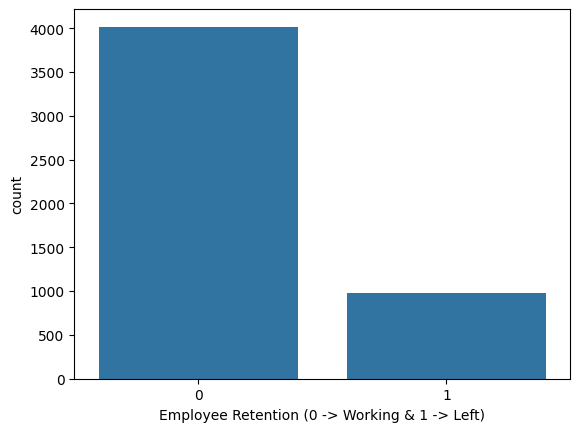

In [25]:
sns.countplot(data= df, x='Attrition_Encoded')
plt.xlabel("Employee Retention (0 -> Working & 1 -> Left)")

The figure shows that out of 5000 employess, 4017 employess continue their job at their own pacea and rest(983) employess left the company

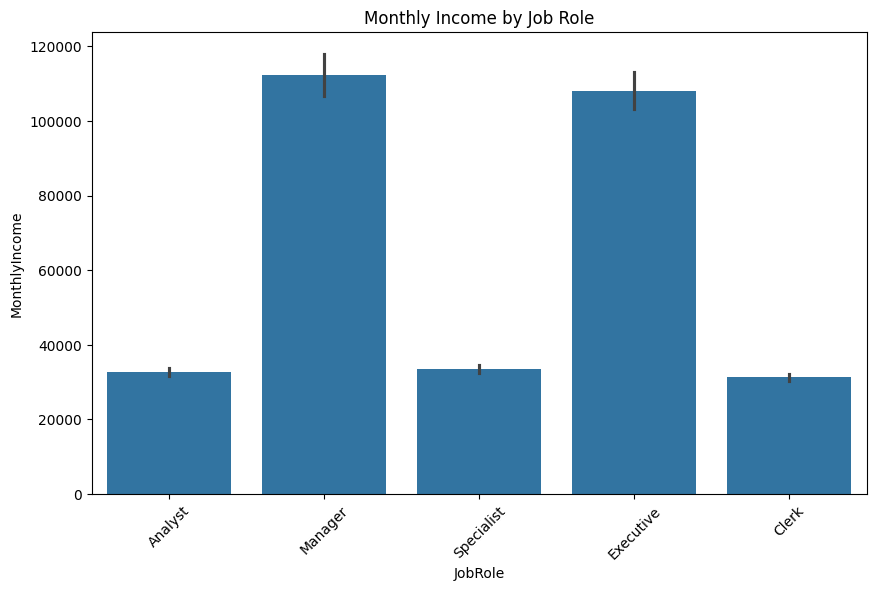

In [26]:
 # Income by Job Role
plt.figure(figsize=(10, 6))
sns.barplot(x='JobRole', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Job Role")
plt.xticks(rotation=45)
plt.show()

#### The figure shows that Manager and Executive has high salary range that Analyst,specialist and clerk.

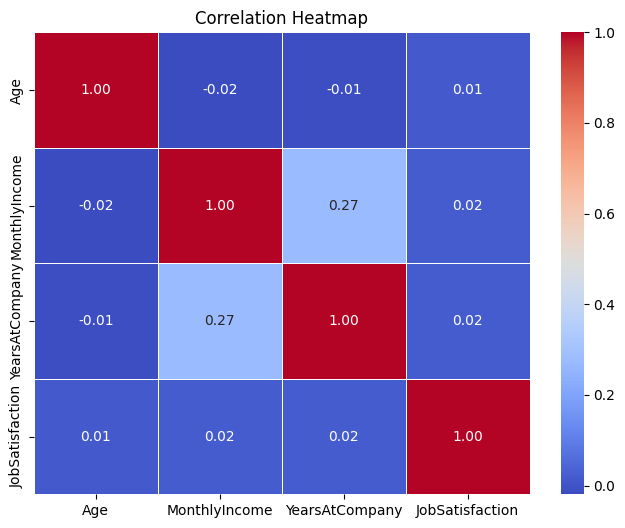

In [27]:
correlation_matrix = df[["Age", "MonthlyIncome", "YearsAtCompany", "JobSatisfaction"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Check the Employees Who Left the Company (Attrition = "Yes")

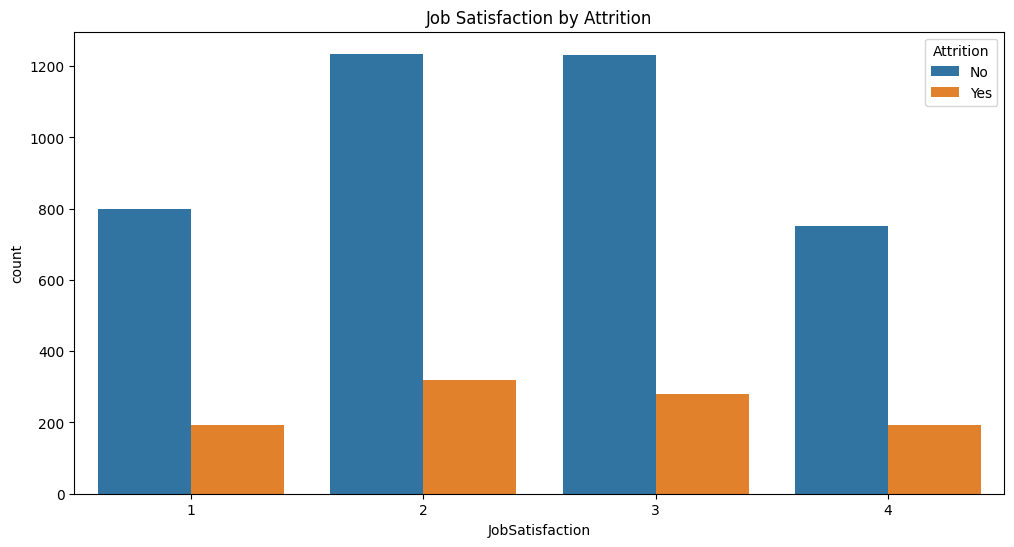

In [28]:
# Ploting Job Satisfaction graph for Employees Who Left vs Stayed
plt.figure(figsize=(12, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction by Attrition")
plt.show()


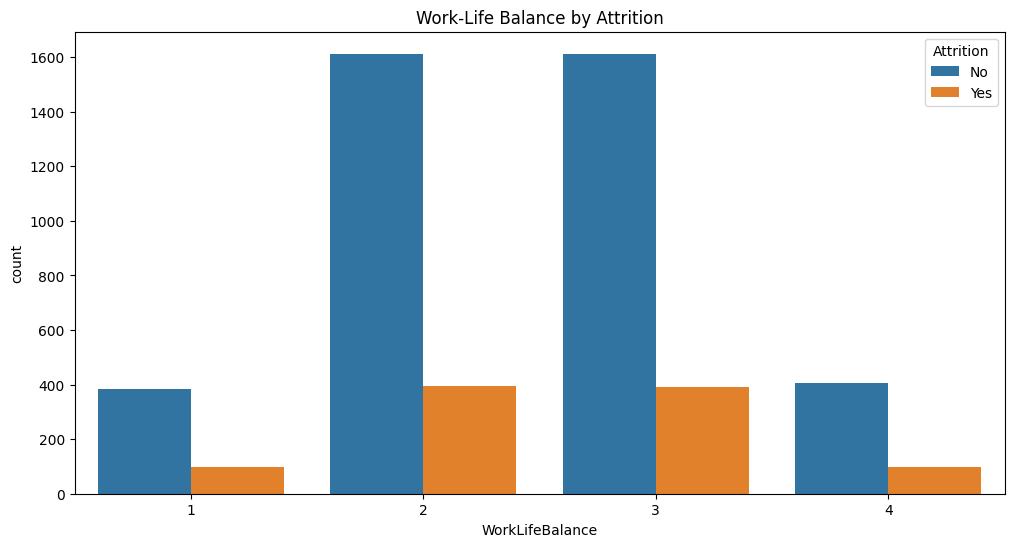

In [29]:
# Ploting Work-Life Balance graph for Employees Who Left vs Stayed
plt.figure(figsize=(12, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Work-Life Balance by Attrition")
plt.show()

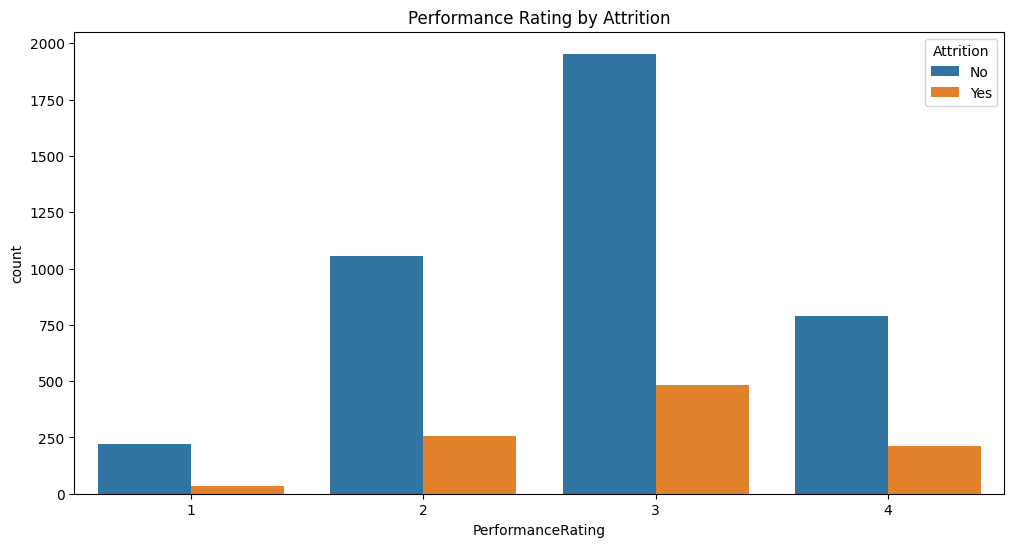

In [30]:
# Analyze Performance Rating for Employees Who Left vs Stayed
plt.figure(figsize=(12, 6))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df)
plt.title("Performance Rating by Attrition")
plt.show()


In [31]:
grouped_attrition = df.groupby('Attrition')[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'PerformanceRating']].mean()
grouped_attrition

,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,PerformanceRating
Attrition,,,,,
No,40.635300,63786.407518,15.499627,2.482450,2.824496
Yes,40.963377,66306.017294,16.048830,2.478128,2.883011


### check how job satisfaction varies for employees who left the company vs those who stayed.

In [32]:
grouped_satisfaction = df.groupby(['Attrition', 'JobSatisfaction']).size().unstack().fillna(0)
grouped_satisfaction


JobSatisfaction,1,2,3,4
Attrition,,,,
No,798,1235,1232,752
Yes,193,319,279,192


### Analyzing attrition across departments can give us insight into which departments have the highest or lowest attrition rates

In [33]:
grouped_department = df.groupby(['Attrition', 'Department']).size().unstack().fillna(0)
grouped_department


Department,Finance,HR,IT,Marketing,Sales
Attrition,,,,,
No,835,781,761,811,829
Yes,187,207,183,197,209


### Understanding if gender plays a role in employee attrition can be useful.

In [34]:
grouped_gender = df.groupby(['Attrition', 'Gender']).size().unstack().fillna(0)
grouped_gender


Gender,Female,Male
Attrition,,
No,1974,2043
Yes,452,531


In [35]:
df.head()

,EmployeeID,Age,Gender,Department,EducationLevel,JobRole,YearsAtCompany,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Overtime,PerformanceRating,Attrition,MonthlyIncome,Gender_Encoded,Attrition_Encoded,Overtime_Encoded
0,1,50,Male,Marketing,1,Analyst,17,4,2,9,Yes,3,No,32956,1,0,1
1,2,36,Female,IT,2,Analyst,5,1,2,6,No,3,No,29193,0,0,0
2,3,29,Male,Finance,3,Manager,16,1,2,5,No,4,No,206465,1,0,0
3,4,42,Male,Marketing,1,Specialist,24,3,3,1,No,3,No,32283,1,0,0
4,5,40,Female,Sales,2,Executive,14,3,2,2,No,2,Yes,18136,0,1,0


In [36]:
df.Department.value_counts()

Department
Sales        1038
Finance      1022
Marketing    1008
HR            988
IT            944
Name: count, dtype: int64

In [37]:
encoder = LabelEncoder()
Department = encoder.fit_transform(df["Department"])
df["Department_Encoded"] =Department

In [38]:
df.Department_Encoded.value_counts()

Department_Encoded
4    1038
0    1022
3    1008
1     988
2     944
Name: count, dtype: int64

In [39]:
df.JobRole.value_counts()

JobRole
Executive     1077
Clerk         1056
Manager        973
Specialist     960
Analyst        934
Name: count, dtype: int64

In [40]:
encoder = LabelEncoder()
JobRole = encoder.fit_transform(df["JobRole"])
df["JobRole_Encoded"] =JobRole

In [41]:
df.JobRole_Encoded.value_counts()

JobRole_Encoded
2    1077
1    1056
3     973
4     960
0     934
Name: count, dtype: int64

In [42]:
# Droping  multiple columns for better model training and testing to predict the actual output.
columns_to_drop = ["Gender", "Overtime", "Attrition", "JobRole","Department"]

df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.to_csv('cleaned_hr_data.csv', index=False)

print("Cleaned data saved successfully!")

Cleaned data saved successfully!
